# Sloan Digital Sky Survey

In [325]:
#import libraries
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
#load datset
df_sky = pd.read_csv("Skyserver.csv")
df_sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [327]:
#basic insights 
df_sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [328]:
df_sky.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [329]:
#Checking for NA values, and there are none.
df_sky.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [330]:
#Check for null values
df_sky.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [331]:
#frequency of categories
for col in df_sky.columns:
    if df_sky[col].dtype=="int64":
        print(df_sky[col].value_counts())
        print()

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

301    10000
Name: rerun, dtype: int64

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

301    62
302    58
304    56
305    55
309    54
       ..
499     1
676     1
507     1
660     1
503     1
Name: field, Length: 703, dtype: int64

2558    222
2559    221
2895    166
276     156
7456    139
       ... 
7319      1
2952      1
7090      1
7562      1
1635      1
Name: plate, Length: 487, dtype: int64

52000    312
54140    222
51909    222
54208    221
51908    214
        ... 
53299      1
55618      1
56991      1
51696      1
53053      1
Name: mjd, Length: 355, dtype: int64

155    29
138    28
454    27
249    26
11   

In [332]:
#frequency of categories
for col in df_sky.columns:
    if df_sky[col].dtype=="float64":
        print(df_sky[col].value_counts())
        print()

1.237650e+18    10000
Name: objid, dtype: int64

226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64

 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64

18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64

17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64

15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.45321    

In [333]:
#Checking for unique values in each column
df_sky.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [334]:
#objid and specobjid are just identifiers so remove them
#The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation, so remove them.

In [335]:
df_sky.drop(['specobjid','objid','rerun','field','camcol','run'],axis=1,inplace=True)

In [336]:
df_sky

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,GALAXY,0.014019,447,51877,229


In [337]:
#The most objects (50%) are galaxies, a little less (40%) are stars and only around (10%) of the rows are classified as QSOs.
df_sky["class"].value_counts().sort_index()

GALAXY    4998
QSO        850
STAR      4152
Name: class, dtype: int64

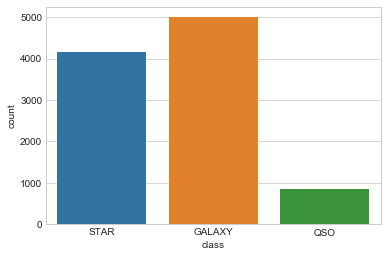

In [338]:
sns.countplot(x=df_sky['class'])

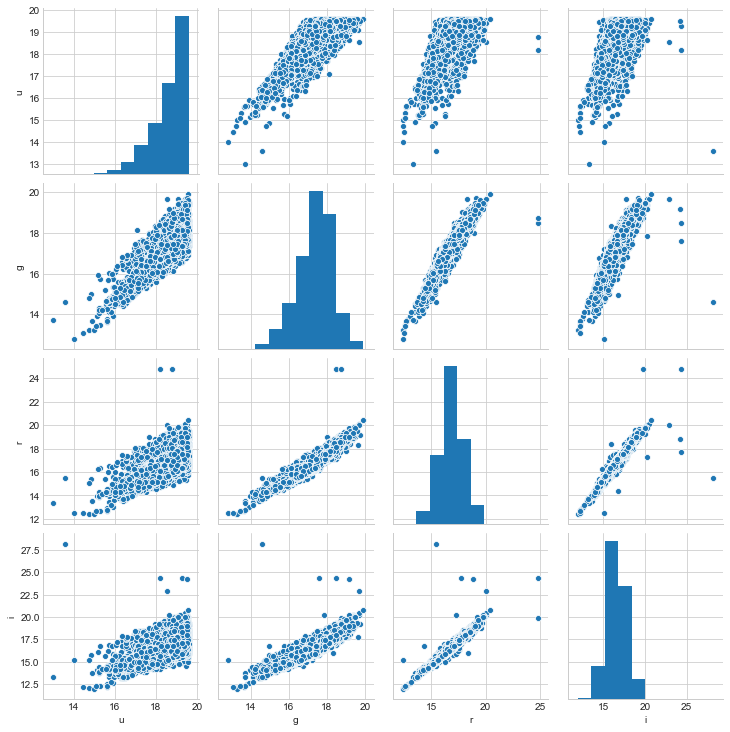

In [339]:
sns.pairplot(df_sky[['u','g','r','i','class']])

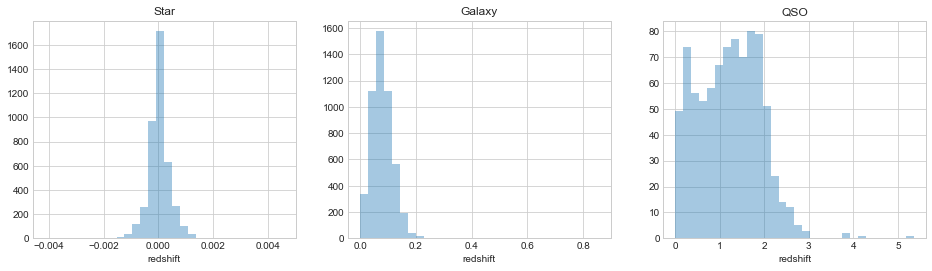

In [340]:
#Lets take a look at the redshift.
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df_sky[df_sky['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df_sky[df_sky['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(df_sky[df_sky['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

<Figure size 432x288 with 0 Axes>

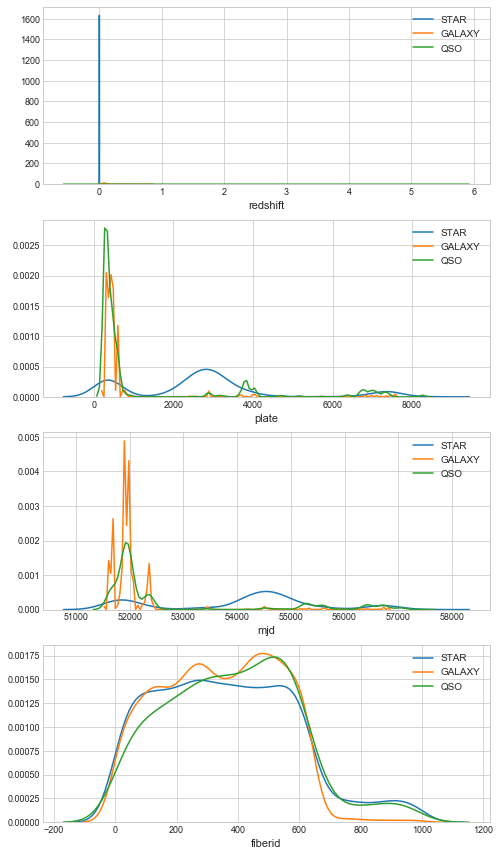

In [341]:

def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(4,1,figsize=(8,15))
    i=0
    for ft in features:
        i+=1
        plt.subplot(4,1,i)
       
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()
t0 = df_sky.loc[df_sky['class'] == 'STAR']
t1 = df_sky.loc[df_sky['class'] == 'GALAXY']
t2 = df_sky.loc[df_sky['class'] == 'QSO']
features = df_sky.columns.values[8:12]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

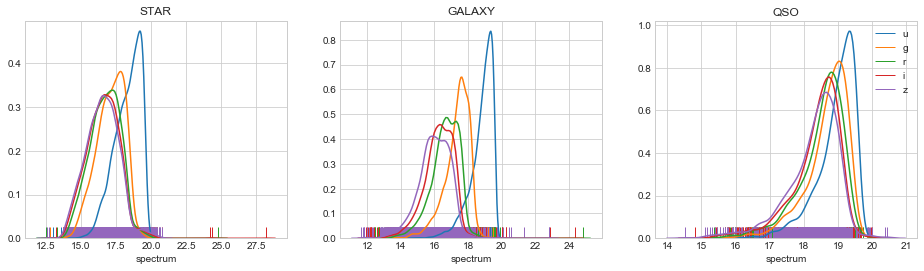

In [342]:
# Spectrum analysis of star, galaxy and QSO
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
t0 = df_sky['u']
t1 = df_sky['g'] 
t2 = df_sky['r'] 
t3 = df_sky['i'] 
t4 = df_sky['z'] 
ax =sns.distplot(t0[df_sky['class']=='STAR'], hist=False, rug=True, ax = axes[0])
ax =sns.distplot(t1[df_sky['class']=='STAR'], hist=False, rug=True, ax = axes[0])
ax =sns.distplot(t2[df_sky['class']=='STAR'], hist=False, rug=True, ax = axes[0])
ax =sns.distplot(t3[df_sky['class']=='STAR'], hist=False, rug=True, ax = axes[0])
ax =sns.distplot(t4[df_sky['class']=='STAR'], hist=False, rug=True, ax = axes[0])
ax.set_xlabel('spectrum')
ax.set_title('STAR')
ax =sns.distplot(t0[df_sky['class']=='GALAXY'], hist=False, rug=True, ax = axes[1])
ax =sns.distplot(t1[df_sky['class']=='GALAXY'], hist=False, rug=True, ax = axes[1])
ax =sns.distplot(t2[df_sky['class']=='GALAXY'], hist=False, rug=True, ax = axes[1])
ax =sns.distplot(t3[df_sky['class']=='GALAXY'], hist=False, rug=True, ax = axes[1])
ax =sns.distplot(t4[df_sky['class']=='GALAXY'], hist=False, rug=True, ax = axes[1])
ax.set_xlabel('spectrum')
ax.set_title('GALAXY')
ax =sns.distplot(t0[df_sky['class']=='QSO'], hist=False, rug=True, ax = axes[2])
ax =sns.distplot(t1[df_sky['class']=='QSO'], hist=False, rug=True, ax = axes[2])
ax =sns.distplot(t2[df_sky['class']=='QSO'], hist=False, rug=True, ax = axes[2])
ax =sns.distplot(t3[df_sky['class']=='QSO'], hist=False, rug=True, ax = axes[2])
ax =sns.distplot(t4[df_sky['class']=='QSO'], hist=False, rug=True, ax = axes[2])
ax.set_xlabel('spectrum')
ax.set_title('QSO')
# labels
spectrum = 'ugriz'
ax.legend(spectrum)




<Figure size 432x288 with 0 Axes>

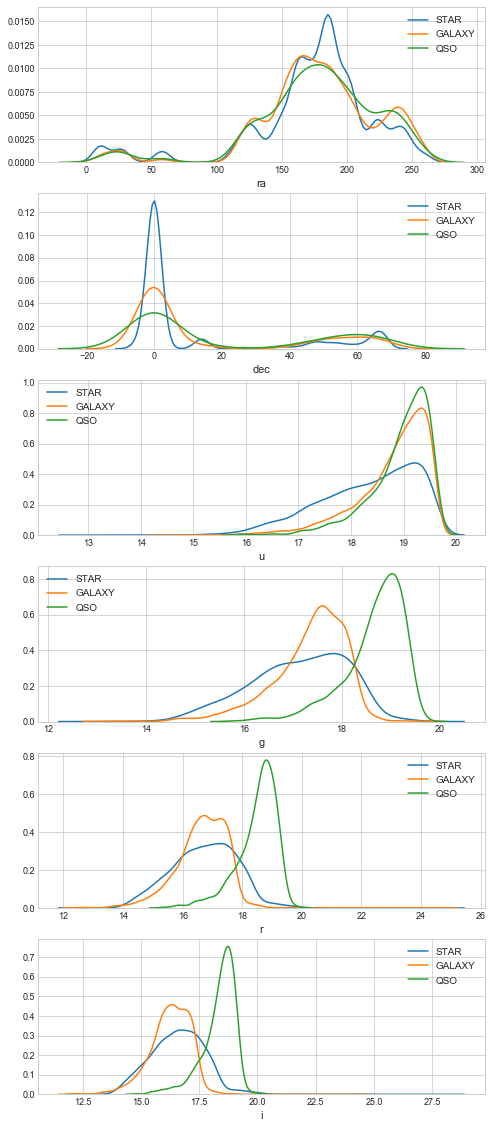

In [343]:
def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(6,1,figsize=(8,20))
    i=0
    for ft in features:
        i+=1
        plt.subplot(6,1,i)
        
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()
t0 = df_sky.loc[df_sky['class'] == 'STAR']
t1 = df_sky.loc[df_sky['class'] == 'GALAXY']
t2 = df_sky.loc[df_sky['class'] == 'QSO']
features = df_sky.columns.values[:6]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

In [344]:
#deal with categorical features
df_sky['class']=df_sky['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

In [345]:
df_sky.corr()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.041189,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.091249,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.284541,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.357352,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.278678,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.205367,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.149444,0.424034,0.112397,0.095658,0.067980
class,0.041189,0.091249,0.284541,0.357352,0.278678,0.205367,0.149444,1.000000,0.621046,-0.466004,-0.527803,-0.012669
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,0.621046,1.000000,-0.038091,-0.057957,0.046532
plate,-0.095329,0.088342,-0.129430,-0.054981,0.019787,0.072958,0.112397,-0.466004,-0.038091,1.000000,0.966881,0.229811


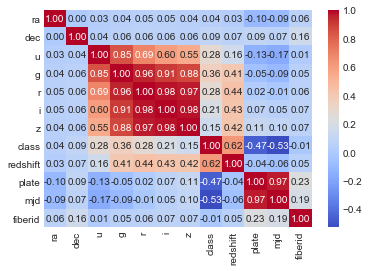

In [346]:
#Correlation matrix between numerical values
sns.heatmap(df_sky.corr(),annot=True,fmt=".2f",cmap = "coolwarm")

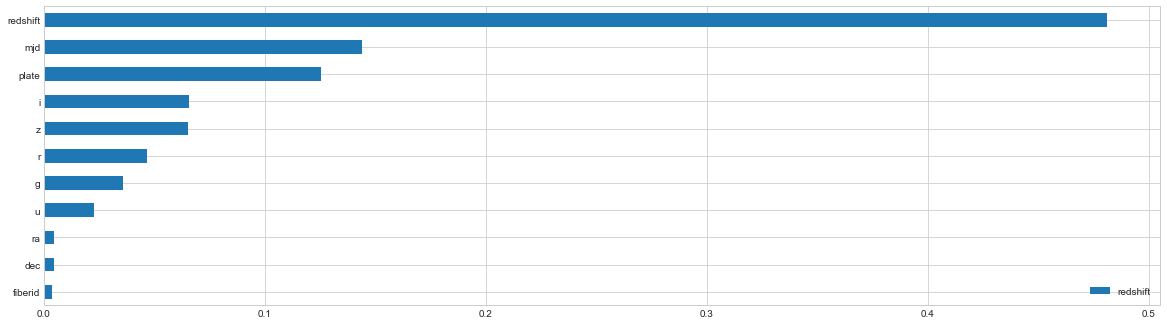

In [347]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(df_sky.drop('class', axis=1), df_sky['class'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df_sky.drop('class', axis=1).columns, columns=["redshift"])
importance.sort_values(by='redshift', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));


In [348]:
# Apply Scaling 
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_sky.drop('class', axis=1))
X = std_scale.transform(df_sky.drop('class', axis=1))
Y = df_sky['class']

In [349]:
#check
X

array([[ 0.16745842, -0.58492272,  1.03148637, ...,  1.03148936,
         1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, ..., -0.63621258,
        -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796, ..., -0.65633905,
        -0.60919097,  0.77527888],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ...,  3.26608697,
         2.69309363,  1.3036668 ],
       [-0.92197294,  1.46432109,  0.31801835, ..., -0.56688806,
        -0.70581092, -0.60143828],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.56688806,
        -0.70581092, -0.5820479 ]])

In [350]:
#check
Y

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: class, Length: 10000, dtype: int32

In [351]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=44, shuffle =True)

In [352]:
#import model libraries
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [353]:
Counter(y_train)

Counter({1: 3998, 0: 3336, 2: 666})

In [354]:
#K Nearest Neighbors
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 92.60
Time consumed for training: 0.757 seconds
Time consumed for prediction: 0.33619 seconds


In [355]:
#Naive Bayes 
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 97.05
Time consumed for training: 0.479 seconds
Time consumed for prediction: 0.13537 seconds


In [356]:
#XGBoost
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.35
Time consumed for training: 2.687
Time consumed for prediction: 0.03142 seconds


In [357]:
#Scitkit-Learn's Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.10
Time consumed for training: 0.442 seconds
Time consumed for prediction: 0.00416 seconds


In [358]:
#Support Vector Machine Classifier
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 96.75
Time consumed for training: 1.150 seconds
Time consumed for prediction: 0.10702 seconds


In [359]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [360]:
#LGBMClassifier
lgb = LGBMClassifier()
training_start = time.perf_counter()
lgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = lgb.predict(X_test)
prediction_end = time.perf_counter()
acc_lgb = (preds == y_test).sum().astype(float) / len(preds)*100
lgb_train_time = training_end-training_start
lgb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's LGBMClassifier's prediction accuracy is: %3.2f" % (acc_lgb))
print("Time consumed for training: %4.3f seconds" % (lgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (lgb_prediction_time))

Scikit-Learn's LGBMClassifier's prediction accuracy is: 99.15
Time consumed for training: 1.057 seconds
Time consumed for prediction: 0.02211 seconds


In [361]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier()
training_start = time.perf_counter()
dtc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's DecisionTreeClassifier's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f seconds" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Scikit-Learn's DecisionTreeClassifier's prediction accuracy is: 98.70
Time consumed for training: 0.123 seconds
Time consumed for prediction: 0.00058 seconds


In [362]:
#LogisticRegression
lr = LogisticRegression()
training_start = time.perf_counter()
lr.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = lr.predict(X_test)
prediction_end = time.perf_counter()
acc_lr = (preds == y_test).sum().astype(float) / len(preds)*100
lr_train_time = training_end-training_start
lr_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's LogisticRegression's prediction accuracy is: %3.2f" % (acc_lr))
print("Time consumed for training: %4.3f seconds" % (lr_train_time))
print("Time consumed for prediction: %6.5f seconds" % (lr_prediction_time))

Scikit-Learn's LogisticRegression's prediction accuracy is: 97.80
Time consumed for training: 0.756 seconds
Time consumed for prediction: 0.00046 seconds


In [363]:
#MLPClassifier
MLP = MLPClassifier()
training_start = time.perf_counter()
MLP.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = MLP.predict(X_test)
prediction_end = time.perf_counter()
acc_MLP = (preds == y_test).sum().astype(float) / len(preds)*100
MLP_train_time = training_end-training_start
MLP_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's MLPClassifier's prediction accuracy is: %3.2f" % (acc_MLP))
print("Time consumed for training: %4.3f seconds" % (MLP_train_time))
print("Time consumed for prediction: %6.5f seconds" % (MLP_prediction_time))

Scikit-Learn's MLPClassifier's prediction accuracy is: 99.05
Time consumed for training: 14.165 seconds
Time consumed for prediction: 0.03083 seconds


In [364]:
#Let's compare the results.
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC','MLP','Logistic','DecisionTree','LGBM'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc,acc_MLP,acc_lr,acc_dtc,acc_lgb],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time, MLP_train_time, lr_train_time, dtc_train_time, lgb_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time, MLP_prediction_time, lr_prediction_time, dtc_prediction_time, lgb_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.35,2.686966,0.031423
LGBM,99.15,1.057049,0.022105
Random Forest,99.10,0.441532,0.004165
MLP,99.05,14.165234,0.030832
DecisionTree,98.70,0.122739,0.000583
Logistic,97.80,0.756293,0.000459
Naive Bayes,97.05,0.479492,0.135370
SVC,96.75,1.149901,0.107016
KNN,92.60,0.756523,0.336188


In [365]:
from sklearn.model_selection import cross_val_score
#LGBM
lgb_cv = LGBMClassifier(n_estimators=100)
scores = cross_val_score(lgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98375 0.9825  0.99    0.9925  0.99375 0.9875  0.9925  0.99375 0.98125
 0.99375]
Mean: 0.9891249999999999
Standard Deviation: 0.004745063224025589


In [366]:
#XGBoost
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.98625 0.98375 0.99    0.9925  0.9925  0.985   0.9925  0.99375 0.9875
 0.9925 ]
Mean: 0.989625
Standard Deviation: 0.0034932971531205495


In [367]:
#XGBoost - Testing optimal hyperparameters
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 99.05


In [368]:
#Confusion Matrix

In [369]:
#'STAR':0,'GALAXY':1,'QSO':2
unique, counts = np.unique(df_sky['class'], return_counts=True)
dict(zip(unique, counts))

{0: 4152, 1: 4998, 2: 850}

In [370]:
predictions = cross_val_predict(xgb, df_sky.drop('class', axis=1), df_sky['class'], cv=3)
confusion_matrix(df_sky['class'], predictions)

array([[4148,    4,    0],
       [   8, 4964,   26],
       [   1,   48,  801]], dtype=int64)

In [371]:
# save the model
import pickle
filename = 'space.pkl'
pickle.dump(xgb, open(filename, 'wb'))

***